Epoch 1/10
422/422 - 91s - 215ms/step - accuracy: 0.9046 - loss: 0.3010 - val_accuracy: 0.9848 - val_loss: 0.0488
Epoch 2/10
422/422 - 89s - 212ms/step - accuracy: 0.9727 - loss: 0.0926 - val_accuracy: 0.9910 - val_loss: 0.0333
Epoch 3/10
422/422 - 91s - 217ms/step - accuracy: 0.9797 - loss: 0.0670 - val_accuracy: 0.9930 - val_loss: 0.0280
Epoch 4/10
422/422 - 97s - 229ms/step - accuracy: 0.9846 - loss: 0.0537 - val_accuracy: 0.9925 - val_loss: 0.0312
Epoch 5/10
422/422 - 136s - 323ms/step - accuracy: 0.9865 - loss: 0.0475 - val_accuracy: 0.9925 - val_loss: 0.0284
Epoch 6/10
422/422 - 201s - 477ms/step - accuracy: 0.9876 - loss: 0.0415 - val_accuracy: 0.9938 - val_loss: 0.0257
Epoch 7/10
422/422 - 121s - 286ms/step - accuracy: 0.9889 - loss: 0.0369 - val_accuracy: 0.9922 - val_loss: 0.0311
Epoch 8/10
422/422 - 117s - 278ms/step - accuracy: 0.9900 - loss: 0.0332 - val_accuracy: 0.9943 - val_loss: 0.0252
Epoch 9/10
422/422 - 86s - 203ms/step - accuracy: 0.9902 - loss: 0.0316 - val_accura

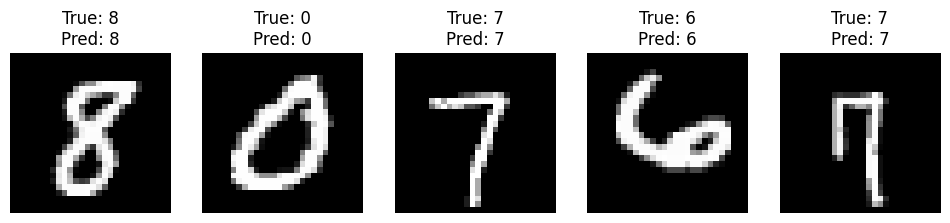

In [1]:
# Clean TensorFlow MNIST CNN (no warnings)
# pip install tensorflow matplotlib

import tensorflow as tf
from tensorflow.keras import layers, models
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report

# 1️⃣ Load MNIST data
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

# 2️⃣ Preprocess data
x_train = x_train.astype("float32") / 255.0
x_test = x_test.astype("float32") / 255.0
x_train = np.expand_dims(x_train, -1)  # shape: (60000,28,28,1)
x_test = np.expand_dims(x_test, -1)

num_classes = 10
y_train_cat = tf.keras.utils.to_categorical(y_train, num_classes)
y_test_cat = tf.keras.utils.to_categorical(y_test, num_classes)

# 3️⃣ Build CNN model using Input layer (✅ no warnings)
model = models.Sequential([
    layers.Input(shape=(28, 28, 1)),             # <-- Input layer here
    layers.Conv2D(32, (3, 3), activation='relu', padding='same'),
    layers.Conv2D(32, (3, 3), activation='relu', padding='same'),
    layers.MaxPooling2D((2, 2)),
    layers.Dropout(0.25),

    layers.Conv2D(64, (3, 3), activation='relu', padding='same'),
    layers.Conv2D(64, (3, 3), activation='relu', padding='same'),
    layers.MaxPooling2D((2, 2)),
    layers.Dropout(0.25),

    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(num_classes, activation='softmax')
])

# 4️⃣ Compile model
model.compile(optimizer='adam', 
              loss='categorical_crossentropy', 
              metrics=['accuracy'])

# 5️⃣ Train model
history = model.fit(
    x_train, y_train_cat,
    epochs=10, batch_size=128,
    validation_split=0.1, verbose=2
)

# 6️⃣ Evaluate model
test_loss, test_acc = model.evaluate(x_test, y_test_cat, verbose=0)
print(f"\n✅ Test Accuracy: {test_acc:.4f}")

# 7️⃣ Predict and visualize 5 samples
y_pred_probs = model.predict(x_test)
y_pred = np.argmax(y_pred_probs, axis=1)

import random
indices = random.sample(range(len(x_test)), 5)
plt.figure(figsize=(12,4))
for i, idx in enumerate(indices):
    plt.subplot(1,5,i+1)
    plt.imshow(x_test[idx].reshape(28,28), cmap='gray')
    plt.title(f"True: {y_test[idx]}\nPred: {y_pred[idx]}")
    plt.axis('off')
plt.show()
